<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/spark_proyectoipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"


import findspark
findspark.init()
findspark.find()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,149 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,224 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [966 kB]
Hit:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRel

'/usr/local/lib/python3.10/dist-packages/pyspark'

# Importamos PySpark y otras funciones que utilizaremos

In [ ]:
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.functions import split, trim
from pyspark.sql.functions import col,desc
from pyspark.sql.functions import col, count, when

In [ ]:
#initializing spark
spark= SparkSession \
       .builder \
       .appName("BootCampEspol") \
       .getOrCreate()

spark

# Analisis exploratorio de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Movies Dataset

In [ ]:
dfMovies = spark.read.csv("/content/drive/MyDrive/Proyecto-6/movies.csv", header=True, inferSchema=True)

In [ ]:
dfMovies.describe().show()

+-------+--------------------+------------------+--------------------+------------------+------------------+----------------+-----------------+------------------+---------------------+----------------------+------+-----------------+-------+
|summary|             movieId|         movieYear|            movieURL|        movieTitle|      critic_score|critic_sentiment|   audience_score|audience_sentiment|release_date_theaters|release_date_streaming|rating|original_language|runtime|
+-------+--------------------+------------------+--------------------+------------------+------------------+----------------+-----------------+------------------+---------------------+----------------------+------+-----------------+-------+
|  count|               10233|             10233|               10233|             10233|              9738|            9738|            10144|             10144|                 7928|                 10233|  7758|            10214|  10216|
|   mean|                NULL|2008.3

In [ ]:
dfMovies.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- movieYear: integer (nullable = true)
 |-- movieURL: string (nullable = true)
 |-- movieTitle: string (nullable = true)
 |-- critic_score: double (nullable = true)
 |-- critic_sentiment: string (nullable = true)
 |-- audience_score: double (nullable = true)
 |-- audience_sentiment: string (nullable = true)
 |-- release_date_theaters: string (nullable = true)
 |-- release_date_streaming: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- runtime: string (nullable = true)



In [ ]:
dfMovies.show(5)

+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+
|             movieId|movieYear|            movieURL|          movieTitle|critic_score|critic_sentiment|audience_score|audience_sentiment|release_date_theaters|release_date_streaming|rating|original_language|runtime|
+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+
|281004c8-bbc3-352...|     1902|https://www.rotte...|  A Trip to the Moon|       100.0|        positive|          90.0|          positive| Oct 4, 1902, Orig...|          Aug 27, 2016|  NULL|  French (France)|    14m|
|ac173b27-b71a-34b...|     1915|https://www.rotte...|The Birth of a Na...|        91.0|        positive|          47.0|          neg

In [ ]:

dfMovies.select("movieId","movieTitle","audience_score","rating").orderBy(F.desc("audience_score")).show(20)


+--------------------+--------------------+--------------+--------------------+
|             movieId|          movieTitle|audience_score|              rating|
+--------------------+--------------------+--------------+--------------------+
|a53b29e0-f89e-430...|     Little Monsters|         100.0|                NULL|
|2f457fce-ead9-32d...| Playing With Sharks|         100.0|                NULL|
|b0abd773-8d61-4eb...|Raise Hell: The L...|         100.0|                NULL|
|87a94713-52e0-32f...|The Bad Guys: Rei...|         100.0|                NULL|
|d250f95b-4eba-35d...|Pray: The Story o...|         100.0|PG (Parental Guid...|
|97e2442a-7dae-367...|The Woman Who Lov...|         100.0|                NULL|
|a3a45dc9-23b5-40e...|The Light of the ...|         100.0|                NULL|
|a6cf048c-1bf0-368...|            The City|         100.0|                NULL|
|173f3f5a-cf6a-396...| Momentum Generation|         100.0|                NULL|
|043e0c53-52e9-30b...|          The Bank

In [ ]:
dfMovies.select("movieId","movieTitle","critic_score","rating").orderBy(F.desc("critic_score")).show(20)

+--------------------+--------------------+------------+------+
|             movieId|          movieTitle|critic_score|rating|
+--------------------+--------------------+------------+------+
|4e702a02-b28e-3ac...|          Stagecoach|       100.0|  NULL|
|513f4ef4-d340-372...|  Great Expectations|       100.0|  NULL|
|a5a28373-c2f8-3e4...|The Philadelphia ...|       100.0|  NULL|
|13b52dfa-6edd-38f...|           Pinocchio|       100.0|     G|
|1a51ff7d-d99e-3ab...|And Then There We...|       100.0|  NULL|
|43082028-b499-31a...|           Open City|       100.0|  NULL|
|a43bfc0d-fc4e-388...|    Red Headed Woman|       100.0|  NULL|
|31380a24-d8b9-309...|       The Gold Rush|       100.0|  NULL|
|1cd7b573-ec6a-3a9...|                   M|       100.0|  NULL|
|f3beb856-32b5-3f8...| The Grapes of Wrath|       100.0|  NULL|
|b6650937-454f-3cb...|The Adventures of...|       100.0|    PG|
|71bca0be-a888-343...|  Sullivan's Travels|       100.0|  NULL|
|281004c8-bbc3-352...|  A Trip to the Mo

## Critics Dataset

In [ ]:
dfCritics = spark.read.csv("/content/drive/MyDrive/Proyecto-6/critic_reviews.csv", header=True, inferSchema=True)

In [ ]:
dfCritics.count()

968361

In [ ]:
dfCritics.describe().show()

+-------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------+--------------------+-------------------+--------------------+--------------------+------------------+-----------------+
|summary|            reviewId|             movieId|        creationDate|       criticName|       criticPageUrl|reviewState|      publicationUrl|    publicationName|           reviewUrl|               quote|    scoreSentiment|    originalScore|
+-------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------+--------------------+-------------------+--------------------+--------------------+------------------+-----------------+
|  count|              968361|              968046|              967636|           958124|              958114|     967564|              967564|             967564|              849906|              934592|            966821|           699436|
|   mean| 1.609002053292

In [ ]:
dfCritics.printSchema()

root
 |-- reviewId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- creationDate: string (nullable = true)
 |-- criticName: string (nullable = true)
 |-- criticPageUrl: string (nullable = true)
 |-- reviewState: string (nullable = true)
 |-- isFresh: boolean (nullable = true)
 |-- isRotten: boolean (nullable = true)
 |-- isRtUrl: boolean (nullable = true)
 |-- isTopCritic: boolean (nullable = true)
 |-- publicationUrl: string (nullable = true)
 |-- publicationName: string (nullable = true)
 |-- reviewUrl: string (nullable = true)
 |-- quote: string (nullable = true)
 |-- scoreSentiment: string (nullable = true)
 |-- originalScore: string (nullable = true)



In [ ]:
dfCritics.show(5)

+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+
|reviewId|             movieId|creationDate|        criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|     publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|
+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+
| 1913967|16db6b7e-176a-3a4...|  1800-01-01|Jonathan Rosenbaum|/critics/jonathan...|      fresh|   true|   false|  false|       true|  /critics/source/66|      Chicago Reader|http://www.chicag...|Terry Gilliam's t...|      POSITIVE|         NULL|
| 1906428|29

# Feature Engineering

## Limpiar Rating

In [ ]:
dfMovies.select("rating").distinct().show()

+--------------------+
|              rating|
+--------------------+
|R (Language|Actua...|
|PG (Some Violence...|
|PG-13 (Sexual Ref...|
|PG-13 (Sexuality|...|
|R (Nudity|Languag...|
|R (Strong Violenc...|
|   R (Some Language)|
|PG-13 (Drug Mater...|
|R (Graphic Bloody...|
|PG-13 (Sexual Con...|
|R (Disturbing Vio...|
|R (Pervasive Lang...|
|R (Grisly Images|...|
|R (Language|Graph...|
|R (Nude Sexual Im...|
|R (Nudity|Brief D...|
|PG (Peril|Action|...|
|R (Sex References...|
|R (Some Language|...|
|R (Language Throu...|
+--------------------+
only showing top 20 rows



In [ ]:
# Limpiar la columna rating para unificar las categorias
dfMovies = dfMovies.withColumn('rating_fixed', trim(split(dfMovies['rating'], '\(').getItem(0)))
dfMovies.show(5)


+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|             movieId|movieYear|            movieURL|          movieTitle|critic_score|critic_sentiment|audience_score|audience_sentiment|release_date_theaters|release_date_streaming|rating|original_language|runtime|rating_fixed|
+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|281004c8-bbc3-352...|     1902|https://www.rotte...|  A Trip to the Moon|       100.0|        positive|          90.0|          positive| Oct 4, 1902, Orig...|          Aug 27, 2016|  NULL|  French (France)|    14m|        NULL|
|ac173b27-b71a-34b...|     1915|https://www.rotte...|The Birth of a Na...|      

In [ ]:
#obteniendo el rating mas comun a pesar del nulo

from pyspark.sql.functions import col, max, count

most_rating= dfMovies.filter(col("rating").isNotNull()) \
  .groupBy("rating") \
  .count() \
  .orderBy(count("rating").desc()) \
  .limit(1) \
  .select("rating").collect()[0][0]

most_rating




'R'

In [ ]:
#El rating de pelicula mas comun es R, sin embargo se reemplazo el rating nulo por No Definido para evitar calificar una pelicula R cuando no lo es.
dfMovies = dfMovies.fillna({'rating_fixed': 'No Definido'})
dfMovies.show(10)

+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|             movieId|movieYear|            movieURL|          movieTitle|critic_score|critic_sentiment|audience_score|audience_sentiment|release_date_theaters|release_date_streaming|rating|original_language|runtime|rating_fixed|
+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|281004c8-bbc3-352...|     1902|https://www.rotte...|  A Trip to the Moon|       100.0|        positive|          90.0|          positive| Oct 4, 1902, Orig...|          Aug 27, 2016|  NULL|  French (France)|    14m| No Definido|
|ac173b27-b71a-34b...|     1915|https://www.rotte...|The Birth of a Na...|      

In [ ]:
#Distribucion de peliculas en base al Rate(PG-13, R, PG, etc)
grpMovies = dfMovies.groupBy("rating_fixed").agg(F.count("movieId").alias('# movies')).orderBy(desc('# movies'))
grpMovies.show()


+------------+--------+
|rating_fixed|# movies|
+------------+--------+
|           R|    3937|
| No Definido|    2475|
|       PG-13|    2154|
|          PG|    1245|
|           G|     244|
|       TV-14|      54|
|       TV-MA|      52|
|       NC-17|      27|
|       TV-PG|      24|
|        TV-G|      20|
|       TV-Y7|       1|
+------------+--------+



In [ ]:
grpMovies_pd = grpMovies.toPandas()

grpMovies_pd = grpMovies_pd.head(5)
grpMovies_pd



,rating_fixed,# movies
0,R,3937
1,No Definido,2475
2,PG-13,2154
3,PG,1245
4,G,244


## Limpiar Criticas

In [ ]:
dfCritics = dfCritics.filter(~F.isnull(F.col("quote")))

In [ ]:
dfCritics.show(5)

+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+
|reviewId|             movieId|creationDate|        criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|     publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|
+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+
| 1913967|16db6b7e-176a-3a4...|  1800-01-01|Jonathan Rosenbaum|/critics/jonathan...|      fresh|   true|   false|  false|       true|  /critics/source/66|      Chicago Reader|http://www.chicag...|Terry Gilliam's t...|      POSITIVE|         NULL|
| 1902262|34

In [ ]:
dfMovies.show(5)

+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|             movieId|movieYear|            movieURL|          movieTitle|critic_score|critic_sentiment|audience_score|audience_sentiment|release_date_theaters|release_date_streaming|rating|original_language|runtime|rating_fixed|
+--------------------+---------+--------------------+--------------------+------------+----------------+--------------+------------------+---------------------+----------------------+------+-----------------+-------+------------+
|281004c8-bbc3-352...|     1902|https://www.rotte...|  A Trip to the Moon|       100.0|        positive|          90.0|          positive| Oct 4, 1902, Orig...|          Aug 27, 2016|  NULL|  French (France)|    14m| No Definido|
|ac173b27-b71a-34b...|     1915|https://www.rotte...|The Birth of a Na...|      

## Join de dataframes Movies y Critics

In [ ]:
# Renombrar la columna 'movieId' antes de realizar el join
dfMovies = dfMovies.withColumnRenamed("movieId", "movie_id")


In [ ]:
dfCritics2 = dfCritics.join(dfMovies['movie_id','movieTitle','critic_score','audience_score','rating_fixed'], dfCritics.movieId == dfMovies.movie_id, "inner")
dfCritics2.show(5)


+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------------------+--------------------+------------+--------------+------------+
|reviewId|             movieId|creationDate|        criticName|       criticPageUrl|reviewState|isFresh|isRotten|isRtUrl|isTopCritic|      publicationUrl|     publicationName|           reviewUrl|               quote|scoreSentiment|originalScore|            movie_id|          movieTitle|critic_score|audience_score|rating_fixed|
+--------+--------------------+------------+------------------+--------------------+-----------+-------+--------+-------+-----------+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------------------+--------------------+------------+--------------+------------+
| 1913967|

In [ ]:
movies_criticas = dfCritics2.select("movieId","quote", "criticPageUrl", "criticName","movieTitle","reviewState","critic_score","audience_score","isTopCritic","scoreSentiment","publicationName","rating_fixed")


In [ ]:
movies_criticas.count()

934592

In [ ]:
movies_criticas.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|             movieId|               quote|       criticPageUrl|        criticName|          movieTitle|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+--------------------+--------------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|16db6b7e-176a-3a4...|Terry Gilliam's t...|/critics/jonathan...|Jonathan Rosenbaum|The Adventures of...|      fresh|        90.0|          82.0|       true|      POSITIVE|      Chicago Reader|          PG|
|34bf7e79-d110-3b3...|Weir, working fro...|/critics/owen-gle...|   Owen Gleiberman|            Fearless|      fresh|        84.0|          80.0|       true|      POSITIVE|Enter

In [ ]:
#reemplazar los criticos nulos por Anonimo
movies_criticas = movies_criticas.fillna({'criticName': 'Anonimo'})
movies_criticas.show(5)


+--------------------+--------------------+--------------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|             movieId|               quote|       criticPageUrl|        criticName|          movieTitle|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+--------------------+--------------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|16db6b7e-176a-3a4...|Terry Gilliam's t...|/critics/jonathan...|Jonathan Rosenbaum|The Adventures of...|      fresh|        90.0|          82.0|       true|      POSITIVE|      Chicago Reader|          PG|
|34bf7e79-d110-3b3...|Weir, working fro...|/critics/owen-gle...|   Owen Gleiberman|            Fearless|      fresh|        84.0|          80.0|       true|      POSITIVE|Enter

In [ ]:
movies_criticas.filter(col("criticName") == "Anonimo").show()

+--------------------+--------------------+-------------+----------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|             movieId|               quote|criticPageUrl|criticName|          movieTitle|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+--------------------+-------------+----------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|8c6885df-cecb-3c6...|Carries its ambit...|         NULL|   Anonimo|The Rescuers Down...|      fresh|        72.0|          68.0|       true|      POSITIVE|Entertainment Weekly|           G|
|94489f7f-07cd-318...|The Prince of Tid...|         NULL|   Anonimo| The Prince of Tides|     rotten|        69.0|          70.0|       true|      NEGATIVE|Entertainment Weekly|           R|
|2111d6d5-6a4c-32c...|Still, tempting a...|  

# Graficos

## Distribution of Movies by Rating



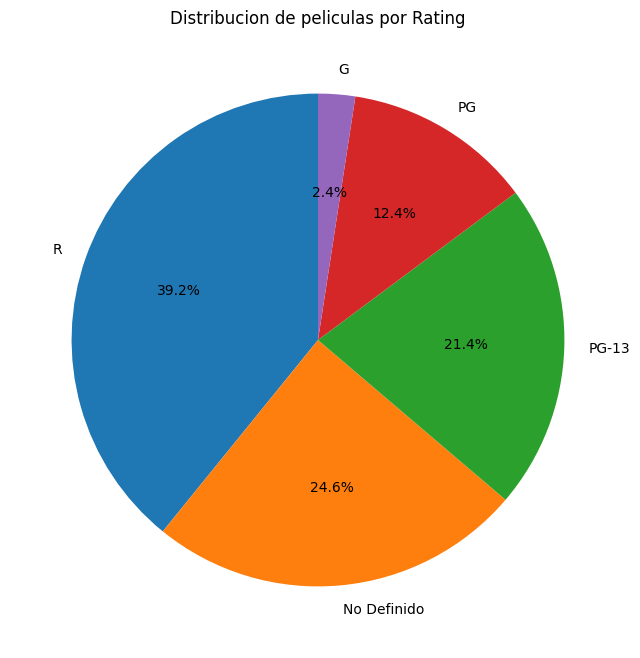

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(grpMovies_pd['# movies'], labels=grpMovies_pd['rating_fixed'], autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de peliculas por Rating')
plt.show()


## Agrupacion por criticos - cuantas peliculas buenas y malas

In [ ]:
# Agrupamos por crítico y contamos las películas buenas y malas
criticas_por_critico = movies_criticas.groupBy("criticName") \
    .agg(
        count(when(col("reviewState") == "fresh", True)).alias("buenas"),
        count(when(col("reviewState") == "rotten", True)).alias("malas")
    )

criticas_por_critico.show()


+------------------+------+-----+
|        criticName|buenas|malas|
+------------------+------+-----+
|        Bob Westal|    32|   13|
|James Berardinelli|  2193| 1628|
|           Anonimo|  3713| 1739|
|        Steve Daly|     2|    4|
|  Harvey S. Karten|  1566|  522|
|    Peter Brunette|    45|   19|
|    Juan M. Mendez|     3|    1|
|     David Germain|   116|  157|
|    Eyal Goldshmid|     1|    0|
|       Kevin Lewin|     1|    0|
|      Adrian Danks|     1|    0|
|       Janet I. Tu|     0|    1|
|      Cary Darling|   403|  114|
|Elizabeth M. Tamny|     0|    1|
|      Sean McBride|   213|  204|
|      John Preston|     2|    1|
|     Jack Sargeant|     6|    2|
|      Edward Noble|     0|    1|
|   Telegraph Staff|     3|    3|
|         Tom Clift|   145|   62|
+------------------+------+-----+
only showing top 20 rows



In [ ]:
criticas_por_critico_pandas = criticas_por_critico.toPandas()


In [ ]:
criticas_por_critico_pandas.sort_values(by='buenas', ascending=False).head(10)

,criticName,buenas,malas
2,Anonimo,3713,1739
2394,Rich Cline,3057,703
3383,Jeffrey M. Anderson,3047,1156
3966,Dennis Schwartz,2626,1682
2886,David Nusair,2547,1798
1081,Roger Moore,2497,2359
3384,Brian Orndorf,2469,2232
1223,Nell Minow,2413,721
1201,Roger Ebert,2219,1205
2964,Frederic and Mary Ann Brussat,2211,342


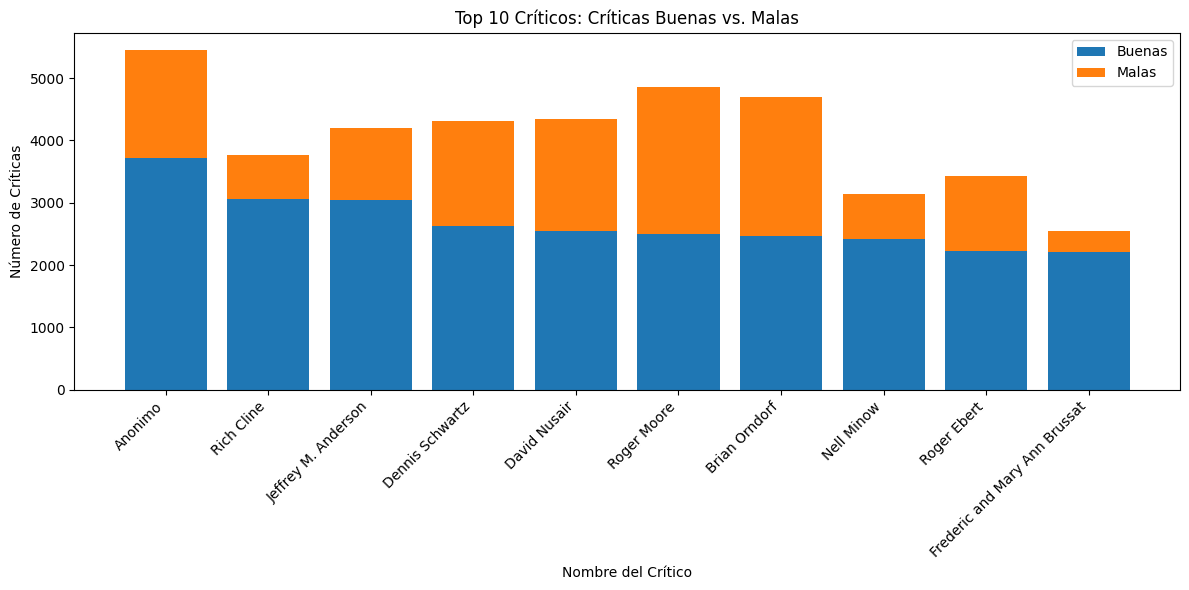

In [ ]:
# Ordenar el df for 'buenas' peliculas en forma descendent para mejor visualizacion
criticas_por_critico_pandas = criticas_por_critico_pandas.sort_values(by='buenas', ascending=False)

# Seleccionar las 10 primeras filas
top_critics = criticas_por_critico_pandas.head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_critics['criticName'], top_critics['buenas'], label='Buenas')
plt.bar(top_critics['criticName'], top_critics['malas'], bottom=top_critics['buenas'], label='Malas')

plt.xlabel('Nombre del Crítico')
plt.ylabel('Número de Críticas')
plt.title('Top 10 Críticos: Críticas Buenas vs. Malas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
critic_pandas = movies_criticas.toPandas()
critic_pandas.head(5)

,movieId,quote,criticPageUrl,criticName,movieTitle,reviewState,critic_score,audience_score,isTopCritic,scoreSentiment,publicationName,rating_fixed
0,16db6b7e-176a-3a45-a31f-158a09f94630,Terry Gilliam's third fantasy feature may not ...,/critics/jonathan-rosenbaum,Jonathan Rosenbaum,The Adventures of Baron Munchausen,fresh,90.0,82.0,True,POSITIVE,Chicago Reader,PG
1,34bf7e79-d110-3b33-93f5-d1e3b79aea10,"Weir, working from a script by Rafael Yglesias...",/critics/owen-gleiberman,Owen Gleiberman,Fearless,fresh,84.0,80.0,True,POSITIVE,Entertainment Weekly,R
2,3aeb7064-f73d-32c1-8432-94babc14e6f1,"Coming out from behind Spike Lee's camera, Ern...",/critics/owen-gleiberman,Owen Gleiberman,Juice,fresh,81.0,90.0,True,POSITIVE,Entertainment Weekly,R
3,58ec5bd7-733b-304a-ac9d-d0e092d50929,"Still, despite its heavy mood and intricate pl...",/critics/bob-westal,Bob Westal,The Spy Who Came in From the Cold,fresh,86.0,82.0,False,POSITIVE,Bullz-Eye.com,No Definido
4,649005b8-02b6-3252-ab03-a792f0830caa,It's the sort of film that can only be watched...,/critics/dave-kehr,Dave Kehr,Nothing but Trouble,rotten,15.0,48.0,True,NEGATIVE,Chicago Tribune,PG-13


## Top movies con mayor numero de reviews

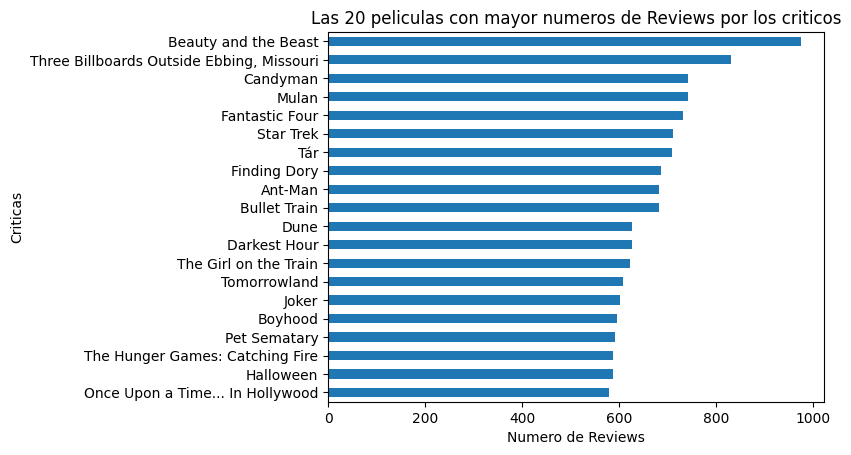

In [ ]:

critic_pandas['movieTitle'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('Numero de Reviews')
plt.ylabel('Criticas')
plt.title('Las 20 peliculas con mayor numeros de Reviews por los criticos')
plt.show()


## Las 10 Companias que ofrecen mayores Reviews

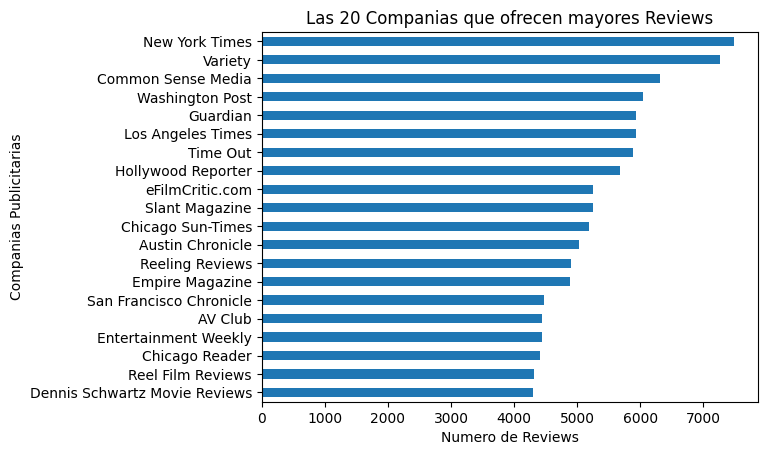

In [ ]:

critic_pandas['publicationName'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('Numero de Reviews')
plt.ylabel('Companias Publicitarias')
plt.title('Las 20 Companias que ofrecen mayores Reviews')
plt.show()

## Las 20 películas con más Reviews por los criticos "fresh"

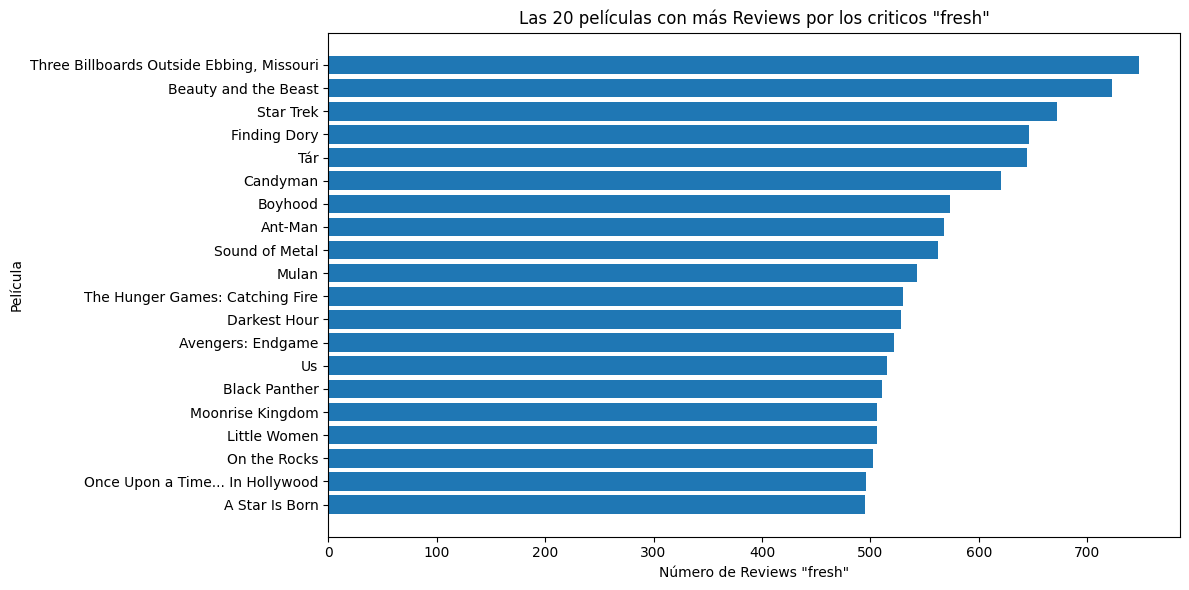

In [ ]:

fresh_movies = movies_criticas.filter(col("reviewState") == "fresh").groupBy("movieTitle").agg(count("movieTitle").alias("count")).orderBy(desc("count")).limit(20).toPandas()

plt.figure(figsize=(12, 6))
plt.barh(fresh_movies['movieTitle'], fresh_movies['count'])
plt.xlabel('Número de Reviews "fresh"')
plt.ylabel('Película')
plt.title('Las 20 películas con más Reviews por los criticos "fresh"')
plt.gca().invert_yaxis()  # Invertir el eje y para que la película con más reseñas esté arriba
plt.tight_layout()
plt.show()


## Las 20 películas con más Reviews por los criticos "rotten"

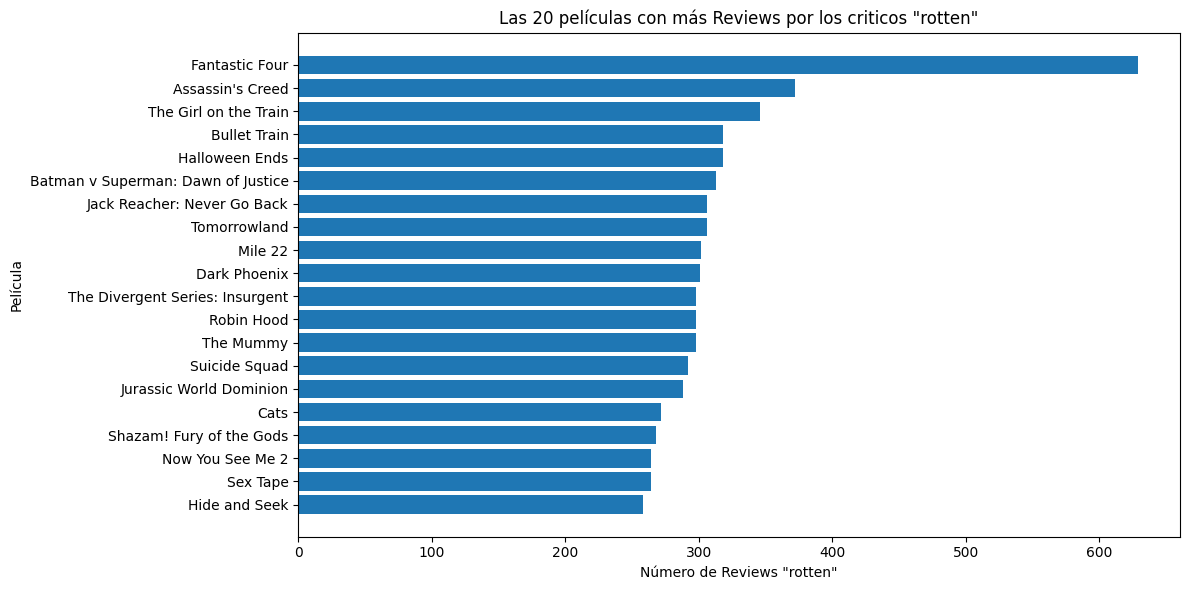

In [ ]:
rotten_movies = movies_criticas.filter(col("reviewState") == "rotten").groupBy("movieTitle").agg(count("movieTitle").alias("count")).orderBy(desc("count")).limit(20).toPandas()

plt.figure(figsize=(12, 6))
plt.barh(rotten_movies['movieTitle'], rotten_movies['count'])
plt.xlabel('Número de Reviews "rotten"')
plt.ylabel('Película')
plt.title('Las 20 películas con más Reviews por los criticos "rotten"')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
critic_pandas.to_csv('/content/drive/MyDrive/Proyecto-6/movies_critic_pandas.csv', index=False)
